The notes below follow derivation from **Geyer and Ralston 2011, Chapter 2: Dynamics of Strongly Stratified Estuaries**.


## Two layer conservation equations

Consider two layer, shallow water flow.

Conservation equations:

$$
B\frac{\partial h_1}{\partial t} + \frac{\partial Q_1}{\partial x} = 0\\
B\frac{\partial h_2}{\partial t} + \frac{\partial Q_2}{\partial x} = 0
$$

Momentum equations:

$$
\frac{\partial u_1}{\partial t} + u_1\,\frac{\partial u_1}{\partial x} + g\,\frac{\partial \eta}{\partial x} + \frac{C_i\,|u_1-u_2|(u_1-u_2)}{h_1} = 0
$$

$$
\frac{\partial u_2}{\partial t} + u_2\,\frac{\partial u_2}{\partial x} + g\,\frac{\partial \eta}{\partial x} + g'\,\frac{\partial h_i}{\partial x} - \frac{C_i\,|u_1-u_2|(u_1-u_2)}{h_1} + \frac{C_d\,|u_2|u_2}{h_2} = 0 
$$

Get baroclinic dynamics by subtracting top layer momentum equation from bottom layer momentum equation:
$$
\frac{\partial (u_2 - u_1)}{\partial t} + u_2\,\frac{\partial u_2}{\partial x} - u_1\,\frac{\partial u_1}{\partial x} + g'\,\frac{\partial h_i}{\partial x}  - C_i\,|u_1-u_2|(u_1-u_2)\left(\frac{1}{h_1} + \frac{1}{h_2}\right) + \frac{C_d\,|u_2|u_2}{h_2} = 0
$$

Define froude number for top and bottom layer as
$$
F_1^2 = \frac{Q_1^2}{g'\,B^2\,h_1^3}\\
F_2^2 = \frac{Q_2^2}{g'\,B^2\,h_2^3}
$$

Sum of the above is the composite Froude number: $G^2 = F_1^2 + F_2^2$. For $G<1$ long internal waves can travel in both directions. For $G>1$, internal waves can only go downstream, where downstream is defined as the flow with wthe greater Froude number. Therefore $G=1$ is the critical compositite Froude number.


With the above definitions for Froude number (and assuming surface height variations are small compared to variations in the sea bed), we can reformulate the baroclinic momentum equation as:

$$
\frac{1}{g'}\,\frac{\partial}{\partial t}(u_2 - u_1)  + (1 - F_1^2 - F_2^2)\,\frac{\partial h_1}{\partial x} =\\
-F_2^2\left(\frac{\partial h_b}{\partial x} \pm C_D\right) - \frac{F_1^2\,h_1 - F_2^2\,h_2}{B}\,\frac{\partial B}{\partial x}\\
\pm\,C_i\,F_{\Delta}^2 + \frac{1}{g'}\,\left(\frac{u_2}{h_2} + \frac{u_1}{h_1}\right)\,\frac{\partial h_1}{\partial t}
$$

where 
$$
F_{\Delta}^2 = \frac{u_1 - u_2)^2}{g'\,h'}\,\,,h' = h_1\,h_2/(h_1 + h_2)
$$

## Plume Lift off

For a steady flow with stagnant (or absent) bottom layer, the baroclinic momentum equation reduces to:

$$
\frac{\partial h_i}{\partial x} = - \frac{F_1^2}{1-F_1^2}\,\frac{h_1}{B}\,\frac{\partial B}{\partial x}
$$

For a large enough $Q_1$ or small enough $h_1$, the flow becomes super critical. Critical thickness is obtained by re-arranging the Froude number:

$$
h=h_{1C}=\left(\frac{Q_1^2}{B^2\,g'} \right)^{1/3}
$$


If $h_{1C} > h_1 + h_2 = h_0$, entire channel is filled with supercritical turbulent water.


## Steady-state wedge

In the wedge regime, the baroclinic momentum equation reduces to a balance between the pressure gradient associated with the slope of the interface and the acceleration (or drag) by the fast flowing top layer:

$$
\frac{\partial h_i}{\partial x} = \pm\,C_i\,\frac{F_1^2}{1-F_1^2}\,\frac{h_0}{h_2}
$$

In this case, we assume a flat bottom channel and constant width. The slope gradient become infinite where $h_2=0$ and $F_1=1$. $h_2=0$ occurs where the interface intersects the bed. $F_1=1$ occurs where the top layer transitions to a flat thin layer - not sure if I understand this.

## Solutions for the steady wedge

First recall the definition of the Froude number:

$$
F_1^2 = \frac{Q_1^2}{g'\,B^2\,h_1^3} = \frac{(u_1\,B\,h_1)^2}{\beta\,\Delta S\,B^2\,h_1^3}\\ 
\therefore\,\,F_1^2 = \frac{u_1^2}{\beta\,S_2\,h_1}
$$

Here we assume $S_1 = 0$psu, such that $\Delta S = S_2$. Following our earlier assumption that suface height variations are small and the bottom slope is flat, we can state 

$$
\frac{\partial h_i}{\partial x} = \frac{\partial h_2}{\partial x} = -\frac{\partial h_1}{\partial x}
$$

### Greyer and Ralston example
The following is a script that integrates $\frac{\partial h_i}{\partial x} = \pm\,C_i\,\frac{F_1^2}{1-F_1^2}\,\frac{h_0}{h_2}$ following the example in Geyer and Ralston:

In [159]:
import numpy as np

#Define flow parameters following example in Geyer and Ralston
H = 10 # total water height (m)
s2 = 25 #wedge salinity (psu)
s1 = 0 #freshwater salinity
ds = s2-s1
C_i = 1e-4 
g = 9.81 #m/s2
u1_arr = np.arange(0.3, 1.21, 0.1) #m/s
beta = 0.8e-3 #haline contraction co-eff (1/psu)

In [162]:
#function to compute froude number
def Froude(u, g, ds, beta, h):
    
    return u/np.sqrt(g*beta*ds*h)


#define model for interface thickness:
def interface_shape(t, y, u1, beta, C_i, ds, h0, g):
    #t=x, y=hi=h2, assuming flat bottom
    h1 = h0-y[0]
    F1 = Froude(u1, g, ds, beta, h1) 
    dh = -C_i*(F1**2/(1-F1**2))*(h0/y[0])
    
    return [dh]

In [163]:
#loop to integrate dh_i/dx equation over multiple layer 1 velocities

from scipy.integrate import odeint
import scipy.integrate as spi


#get interface for different outflow speeds
hi_ls = []
F1_ls = []
x_ls = []
for u1 in u1_arr:
    
    #define initial h1 so that Froude number = 0.9999 - just below critical
    F1_0 = 0.9999
    h1_0 = u1**2/(F1_0**2*ds*beta*g) 
    h2_0 = H-h1_0
    
    #define initial conditions
    h2_init = np.array([h2_0]) 
    x_end = 50e3 #meters
    
    #load and intialize interface model
    dx = 1 #meter
    ode =  spi.ode(interface_shape) #
    ode.set_f_params(u1, beta, C_i, ds, H, g)

    ode.set_integrator('lsoda')
    ode.set_initial_value(h2_init,t=0)

    ts = []
    ys = []
    #intergrate interface equation
    while ode.successful() and ode.t < x_end and ode.y[0]>0.2:
        #ode.t is the independent variable (x)
        #ode.y is the solution at x (h_i)
        ode.integrate(ode.t + dx) 
        ts.append(ode.t)
        ys.append(ode.y[0])
        
        
    x = np.array(ts)
    hi = np.array(ys)
    F1 = Froude(u1, g, ds, beta, (H-hi)) 
    
    x_ls.append(x)
    hi_ls.append(hi)
    F1_ls.append(F1)


In [138]:
len(F1_ls[8])

1510

Plot results....

In [165]:
%matplotlib inline

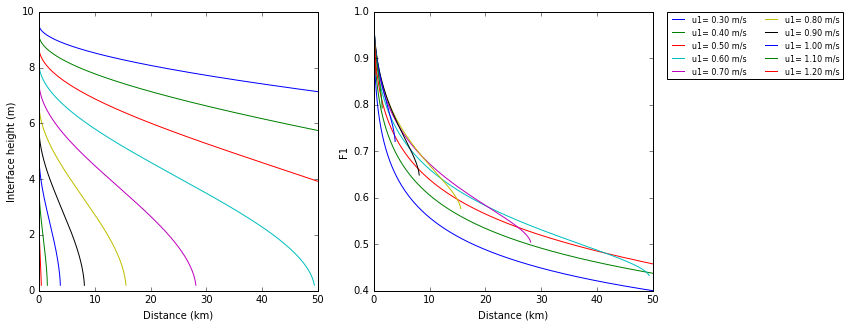

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,5))

for i in range(len(F1_ls)):
    
    plt.subplot(121)
    plt.plot(x_ls[i]/1000, np.array(hi_ls[i]), label='u1= %.2f m/s'%u1_arr[i])
    plt.xlabel("Distance (km)")
    plt.ylabel("Interface height (m)")
    

    plt.subplot(122)
    plt.plot(x_ls[i]/1000, np.array(F1_ls[i]), label='u1= %.2f m/s'%u1_arr[i])
    plt.xlabel("Distance (km)")
    plt.ylabel("F1")
    #plt.legend(loc=0, fontsize=8, ncol=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8, ncol=2)

plt.show()

*Note*: It wasn't completely clear how Geyer and Ralston initialized $h_i$ at $x=0$. Here I just assumed, top layer flow was just below critical at the $x=0$, then integrated forward (which in this is landward). The results are slightly different but still capture 

### Sub-glacial discharge lab experiment

The above computation is repeated for our current lab set up, which tries to capture the essence of subglacial discharge. This is very analogous to the estuarine case with the following exceptions: 

+ The flow is constrained by rectangular channel with a rigid lid 
+ Freshwater is pumped into the channel at all levels
+ The channel is connected to the bottom a deeper reservior containing saltier water 


The first situation is already dealt with because we chose to neglect free surface height variations in our earlier derivations. The second condition adds a new complication at the boundary but in practice the freshwater will tend to immediately rise to the top of the channel. This will generate some mixing between the two layers but we will neglect that and only consider the two layer flow just downstream. 

The third situation introduces a new pressure term due to the hydrostatic pressure imposed by the height of the salt water reservior. Hence, in steady state, the position of the wedge will be determined by the balance of horizontal forces due to the hydrostatic head from the reservior, the sloping interface within the channel and by the drag imparted by the overlying freshwater flow. The first two forces will tend to push the salt water (wedge?) into the channel. The latter term will push the wedge out of the channel.

First, we repeat calculation ignoring the extra pressure head:

In [309]:
#Define flow parameters 
#(I forgot my lab notebook with the exact measurements - using best guesses for now)
H0 = 0.01 # total water height in channel (m)
W0 = 0.01 #channel width (m)
s2 = 3.3 #reservior salinity (psu)
s1 = 0 #freshwater salinity
ds = s2-s1
beta = 0.8e-3 #haline contraction co-eff (1/psu)
C_i = 1e-4 #interfacial drag coefficient
g = 9.81 #m/s2
g_p = g*ds*beta
Q_cc_min = np.arange(10, 990, 50) #pump rate cm3/min
Q_m3_sec = Q_cc_min*(1e-6/60)
u0_arr = Q_m3_sec/(H0*W0) #flow speed through channel assuming it is filled with freshwater (m/s)
u_tube_arr = Q_m3_sec/(0.01**2*np.pi*8) #flow speed through single tube (r=1cm) assuming 8 tubes (m/s)
Ff_arr = Q_m3_sec/(g_p*W0**2*H0**3)**(0.5) #Freshwater Froude number assuming layer 1 fills channel
Ri_b1 = g_p*H0/(u0_arr)**2

In [285]:
print(u_c_arr)

[  8.54700855e-05   5.12820513e-04   9.40170940e-04   1.36752137e-03
   1.79487179e-03   2.22222222e-03   2.64957265e-03   3.07692308e-03
   3.50427350e-03   3.93162393e-03   4.35897436e-03   4.78632479e-03
   5.21367521e-03   5.64102564e-03   6.06837607e-03   6.49572650e-03
   6.92307692e-03   7.35042735e-03   7.77777778e-03   8.20512821e-03]


In [286]:
print(u_tube_arr)

[  6.63145596e-05   3.97887358e-04   7.29460156e-04   1.06103295e-03
   1.39260575e-03   1.72417855e-03   2.05575135e-03   2.38732415e-03
   2.71889694e-03   3.05046974e-03   3.38204254e-03   3.71361534e-03
   4.04518814e-03   4.37676094e-03   4.70833373e-03   5.03990653e-03
   5.37147933e-03   5.70305213e-03   6.03462493e-03   6.36619772e-03]


In [287]:
print(g_p)

0.0258984


Below, is the freshwater froude number ($F_1$ assuming layer 1 occupies the full width of the channel) as a function of pump rate

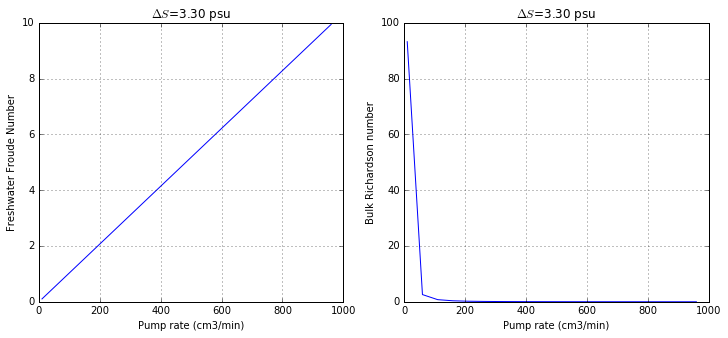

In [310]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(Q_cc_min, Ff_arr)
plt.xlabel("Pump rate (cm3/min)")
plt.ylabel("Freshwater Froude Number")
plt.title("$\Delta S$=%.2f psu" %ds)
plt.grid(True)

plt.subplot(122)
plt.title("$\Delta S$=%.2f psu" %ds)
plt.plot(Q_cc_min, Ri_b1)
plt.xlabel("Pump rate (cm3/min)")
plt.ylabel("Bulk Richardson number")
plt.ylim(0,100)
plt.grid(True)

The freshwater froude number is essentially the lower bound on the lower bound on the $F_1$. In priniple, the freshwater layer can occupy an infinitely thin layer within the channel. The critical layer thickness for the freshwater layer to become unstable is given by:

$$
h=h_{1C}=\left(\frac{Q_1^2}{B^2\,g'} \right)^{1/3}
$$

Below is the critical layer thickness as a function of pump rate.

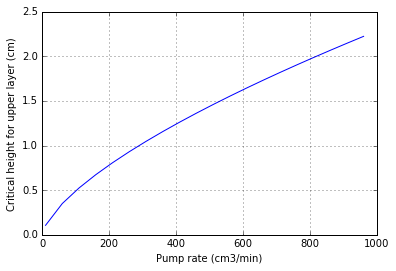

In [293]:
h_1c = ((Q_m3_sec)**2/(W0**2*g_p))**(1./3)
plt.figure()
plt.plot(Q_cc_min, h_1c*100)
plt.ylabel("Critical height for upper layer (cm)")
plt.xlabel("Pump rate (cm3/min)")
plt.grid(True)

This curve shows that it will require a very large flow rate to obtain a Froude number greater than 1 with the current channel geometry. More precisely, $Q_{1C}= \sqrt{H^3\,B^2\,g'}$

In [214]:
Q_c_m3_sec = np.sqrt(H0**3*W0**2*g_p)
Q_c_cm3_min = Q_c_m3_sec*1e6*60
print("Minimum freshwater flow rate to obtain F1=1 in whole channel:")
print("%.2f cm3/min" %Q_c_cm3_min)

Minimum freshwater flow rate to obtain F1=1 in whole channel:
10312.95 cm3/min


A 10,000 cc/min flow rate is likely not feasible, so we will need to adjust $g_p$ to exceed the Froude number. We can do this by adjusting $g_p$, that is the salinity difference between the two layers. Assuming a flow rate of 500 cc/min, the freshwater Froude number as a function of ambient salinity is given below:

Plot richardson number and Froude number vs discharge for different $\Delta S$:

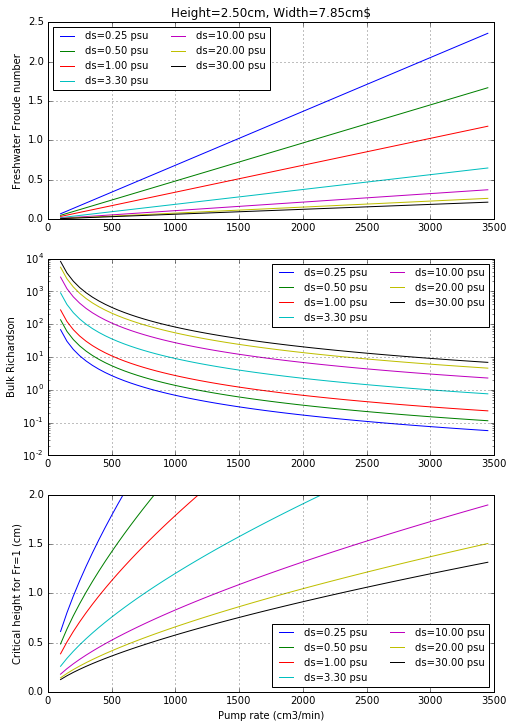

In [320]:
H0 = 0.025 # total water height in channel (m)
W0 = 0.025*np.pi #channel width (m)
s2 = 3.3 #reservior salinity (psu)

Ri_b1 = g_p*H0/(u0_arr)**2


Q_cc_min = np.arange(100, 3500, 50) #pump rate cm3/min
Q_m3_sec = Q_cc_min*(1e-6/60)
ds_arr2 = np.array([0.25, 0.5, 1, 3.3, 10, 20, 30])
g_p_arr2 = ds_arr2*beta*g

fig, axes = plt.subplots(3,1, figsize=(8,12))
axes = axes.flatten()

for i,gp in enumerate(g_p_arr2):
    
    Ff_i = Q_m3_sec/(gp*H0**2*W0**3)**(0.5)
    Ri_bi = gp*H0/(Q_m3_sec/(H0*W0))**2
    h_1c = ((Q_m3_sec)**2/(W0**2*gp))**(1./3)
    
    
    axes[0].plot(Q_cc_min, Ff_i, label='ds=%.2f psu' %ds_arr2[i])
    axes[1].semilogy(Q_cc_min, Ri_bi, label='ds=%.2f psu' %ds_arr2[i])
    axes[2].plot(Q_cc_min, h_1c*100, label='ds=%.2f psu' %ds_arr2[i])

plt.sca(axes[0])
plt.title("Height=%.2fcm, Width=%.2fcm" %(H0*100, W0*100))
plt.legend(loc=0, ncol=2, fontsize=10)
plt.ylabel("Freshwater Froude number")
#plt.xlabel("Pump rate (cm3/min)")
plt.grid(True)

plt.sca(axes[1])
plt.legend(loc=0, ncol=2, fontsize=10)
plt.ylabel("Bulk Richardson")
#plt.xlabel("Pump rate (cm3/min)")
plt.grid(True)

plt.sca(axes[2])
plt.legend(loc=0, ncol=2, fontsize=10)
plt.ylabel("Critical height for Fr=1 (cm)")
plt.xlabel("Pump rate (cm3/min)")
plt.grid(True)
plt.ylim(0, 2)

plt.savefig("flow_properties.pdf", bbox_inches='tight')

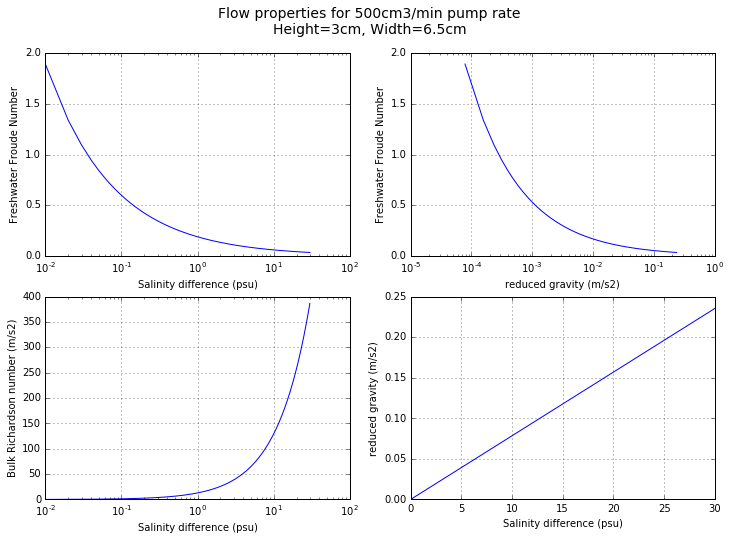

In [280]:
ds_arr = np.arange(0.01,30,0.01)
Q_x_cm3_min = 500 #cm3/min
Q_x_m3_sec = Q_x_cm3_min*(1e-6/60)
Ff_arr = Q_x_m3_sec/(g*beta*dS_arr*H0**2*W0**3)**(0.5)
g_p_arr = ds_arr*beta*g
Ri_b2 = g_p_arr*H0/(Q_x_m3_sec/(H0*W0))**2

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.semilogx(ds_arr, Ff_arr)
plt.grid(True)
plt.xlabel("Salinity difference (psu)")
plt.ylabel("Freshwater Froude Number")


plt.subplot(222)
plt.semilogx(g_p_arr, Ff_arr)
plt.grid(True)
plt.xlabel("reduced gravity (m/s2)")
plt.ylabel("Freshwater Froude Number")

plt.subplot(223)
plt.semilogx(ds_arr, Ri_b2)
plt.grid(True)
plt.xlabel("Salinity difference (psu)")
plt.ylabel("Bulk Richardson number (m/s2)")

plt.subplot(224)
plt.plot(ds_arr, g_p_arr)
plt.grid(True)
plt.xlabel("Salinity difference (psu)")
plt.ylabel("reduced gravity (m/s2)")


plt.suptitle("Flow properties for 500cm3/min pump rate\nHeight=3cm, Width=6.5cm", fontsize=14)
plt.savefig("flow_properties_500cc.pdf", bbox_inches='tight')

In [271]:
# plt.figure(figsize=(8,6))
# ds_arr2 = np.array([0.1, 0.25, 0.5, 1, 3.3, 10])
# g_p_arr2 = ds_arr2*beta*g
# for i,gp in enumerate(g_p_arr2):
#     h_1c = ((Q_m3_sec)**2/(W0**2*gp))**(1./3)
#     plt.plot(Q_cc_min, h_1c*100, label='ds=%.2f psu' %ds_arr2[i])

# plt.legend(loc=0, ncol=2, fontsize=10)
# plt.ylabel("Critical height for upper layer (cm)")
# plt.xlabel("Pump rate (cm3/min)")
# plt.grid(True)

Plot critical thickness vs discharge rate for different salinities: 

### Solutions for wedge shape in the lab

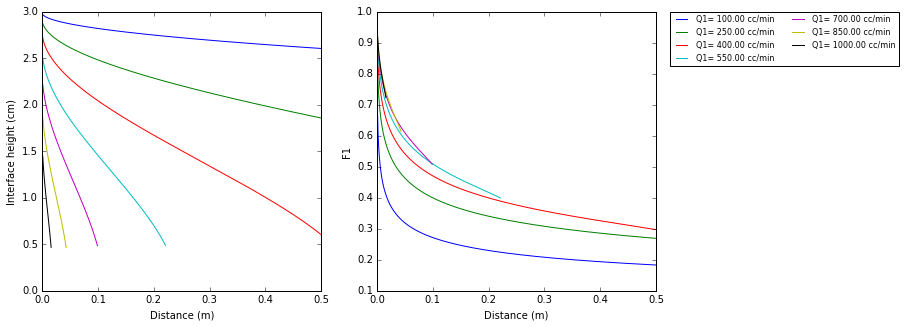

In [308]:
#loop to integrate dh_i/dx equation over multiple layer 1 velocities

from scipy.integrate import odeint
import scipy.integrate as spi


H0 = 0.03 # total water height in channel (m)
W0 = 0.03 #channel width (m)
# s2 = 33 #reservior salinity (psu)
# s1 = 0 #freshwater salinity
ds = 3.3
beta = 0.8e-3 #haline contraction co-eff (1/psu)
C_i = 1e-1 #interfacial drag coefficient
g = 9.81 #m/s2
g_p = g*ds*beta

Q_cc_min = np.arange(100, 1001, 150) #pump rate cm3/min
Q_m3_sec = Q_cc_min*(1e-6/60)


#get interface for different outflow speeds
hi_ls = []
F1_ls = []
x_ls = []
for q1 in Q_m3_sec:
    
    u1 = q1/(H0*W0)
    
    #define initial h1 so that Froude number = 0.9999 - just below critical
    F1_0 = 0.9999
    h1_0 = u1**2/(F1_0**2*ds*beta*g) 
    h2_0 = H0-h1_0
    
    
    #define initial conditions
    h2_init = np.array([h2_0]) 
    x_end = 1 #meters
    
    #load and intialize interface model
    dx = 0.001 #meter
    ode =  spi.ode(interface_shape) #
    ode.set_f_params(u1, beta, C_i, ds, H0, g)

    ode.set_integrator('lsoda')
    ode.set_initial_value(h2_init,t=0)

    ts = []
    ys = []
    #intergrate interface equation
    while ode.successful() and ode.t < x_end and ode.y[0]>0.005:
        #ode.t is the independent variable (x)
        #ode.y is the solution at x (h_i)
        ode.integrate(ode.t + dx) 
        ts.append(ode.t)
        ys.append(ode.y[0])
        
        
    x = np.array(ts)
    hi = np.array(ys)
    F1 = Froude(u1, g, ds, beta, (H0-hi)) 
    
    x_ls.append(x)
    hi_ls.append(hi)
    F1_ls.append(F1)
    
    
plt.figure(figsize=(11,5))

for i in range(len(F1_ls)):
    
    plt.subplot(121)
    plt.plot(x_ls[i], np.array(hi_ls[i]*100), label='Q1= %.2f cc/min'%Q_cc_min[i])
    plt.xlabel("Distance (m)")
    plt.ylabel("Interface height (cm)")
    plt.xlim(0, 0.5)
    

    plt.subplot(122)
    plt.plot(x_ls[i], np.array(F1_ls[i]), label='Q1= %.2f cc/min'%Q_cc_min[i])
    plt.xlabel("Distance (m)")
    plt.ylabel("F1")
    #plt.legend(loc=0, fontsize=8, ncol=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8, ncol=2)
    plt.xlim(0, 0.5)

plt.show()


In [306]:
1000*(1e-6/60)/(np.pi*0.01**2)*100

5.305164769729845